*Note: This file is provided in two formats: 
Python (simpleExample.py) and a Jupyter iPython 
notebook (simpleExample.ipynb).  The 
iPython notebook opens in a web browser and 
includes plots in an interactive format.  To 
open the .ipynb file, run:*
    
    jupyter notebook simpleExample.ipynb

*To run the .py file in iPython at the command line, run:*

    ipython --pylab
    %run simpleExample.py
    show()

simpleExample.ipynb
-------------------

- Bryan Daniels

- 1.29.2014

- Uses a simple 1D harmonic oscillator example to demonstrate usage of SirIsaac.

In [1]:
import scipy, pylab
import FittingProblem
%matplotlib inline

Failed to import libsbml.
SBML import and export not available.


Load example data
-----------------

In the example data file, we have four columns, each with 100 data points, listing:

* Initial condition *x_init*
* Measurement time *t*
* Measurement value *x*
* Measurement uncertainty (standard deviation)

In [2]:
data = scipy.loadtxt('simpleExample_data.txt')

We now put this in a format compatible with SirIsaac.  First we make a list of input values (in this case initial conditions):



In [3]:
indepParamsList = [ [ expt[0] ] for expt in data ]

In [4]:
indepParamsList[:3]

[[1.1272274339047885], [1.403399302209734], [1.140086651015479]]

Next, we have a corresponding list of data taken at each of those input values, in the format below.  In this case, we only have one variable *x*.  (Note: In general, multiple timepoints could be also be measured at each input value; in all of our examples, we measure all variables at a single timepoint per input value.)

In [5]:
# [ {'var1': { time0: ( value, uncertainty ) },
#    'var2': { time0: ( value, uncertainty ) },
#     ... },
#   {'var1': { time1: ( value, uncertainty ) },
#    'var2': { time1: ( value, uncertainty ) },
#     ... },
#   ... ]

In [6]:
sirIsaacData = []
for expt in data:
    sirIsaacData.append( { 'x': { expt[1]: ( expt[2], expt[3] ) } } )

In [7]:
sirIsaacData[:3]

[{'x': {0.54547015103351271: (1.2623428576416922, 0.10000000000000001)}},
 {'x': {0.17186531503221092: (2.0189960057874279, 0.10000000000000001)}},
 {'x': {0.85293180948530178: (1.371899809743871, 0.10000000000000001)}}]

Finally, SirIsaac will need to know what to call the input and output values.  In this case, the input corresponds to the initial value of *x*.  The way to indicate this to SirIsaac is by using the name 'x_init', where 'x' is the name of the corresponding variable.

Here we have one input and one output:

In [8]:
outputNames = ['x']
indepParamNames = ['x_init']

Create SirIsaac FittingProblem
------------------------------

We'll attempt to fit a model in the power law class.  To do this, we'll create an instance of a PowerLawFittingProblem.  Here we set up its arguments and create it:

In [9]:
# complexityList lists which models in the model class may be tested.
# (Note that by default SirIsaac will still stop once 3 models have 
#  smaller estimated log-likelihood.)
complexityStepsize = 2 # increase complexity with steps of size 2
complexityMax = 25 # don't try models with complexity > 25
complexityList = range(0,complexityMax,complexityStepsize) 

# ensGen controls the generation of the initial ensemble of 
# parameter starting points.
totalSteps = 1e3
keepSteps = 10
seeds = (1,1) # use a fixed random seed
ensTemperature = 100.
ensGen = FittingProblem.EnsembleGenerator( totalSteps, keepSteps,
    temperature=ensTemperature, seeds=seeds )

# Parameters that control when local fitting stops.
avegtol = 1e-2
maxiter = 100

# priorSigma controls the width of priors on all parameters
priorSigma = 3.

# If you have pypar installed, you can run on multiple processors
numprocs = 10

# We'll only use a subset of our data to make the example run faster
N = 20

p = FittingProblem.PowerLawFittingProblem( complexityList, 
    sirIsaacData[:N], indepParamsList=indepParamsList[:N], 
    outputNames=outputNames, indepParamNames=indepParamNames, 
    ensGen=ensGen, avegtol=avegtol, maxiter=maxiter,
    priorSigma=priorSigma, numprocs=numprocs, verbose=True )

Run parameter fitting
---------------------

The bulk of computation time is used to fit the parameters of each model to the data.  Uncomment the following lines to run the parameter fitting, which takes a few hours using 10 processors.  Or skip ahead to load a version that has already been fit.

In [16]:
#p.fitAll()
#
#FittingProblem.save(p,'simpleExample_savedFittingProblem.data')

SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_beta_0', 'g_0_0']
generateEnsemble_pypar: Generating parameter ensemble with 1000.0 total members, using 10 processors.
SloppyCellFittingModel.fitToData: Cost = 463.296763946 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 463.29604832 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 463.296233023 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 463.296031761 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 463.296940976 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.296199782 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 439.956285954 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.295976608 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 439.956273603 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 439.956873659 ( 2 )
SloppyCellFittingModel.fitToData: Best-fit cost =  439.956273603
fittingProblem.fitAll: L = -224.078124024
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_

In [10]:
p = FittingProblem.load('simpleExample_savedFittingProblem.data')

Analyze the selected model
--------------------------

Here we plot predicted timecourses from the selected model for the first 10 in-sample initial conditions, using plotBestModelResults:

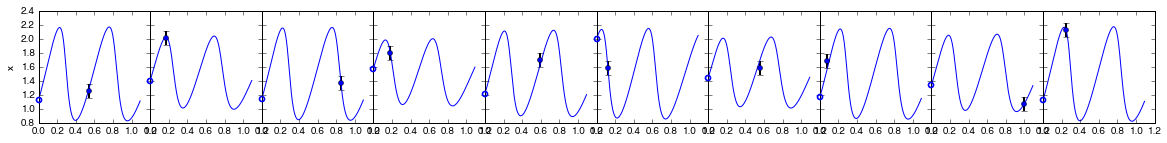

In [11]:
pylab.figure(figsize=(20,2))
p.plotBestModelResults(plotInitialConditions=True,indices=range(10));

And now for out-of-sample data:

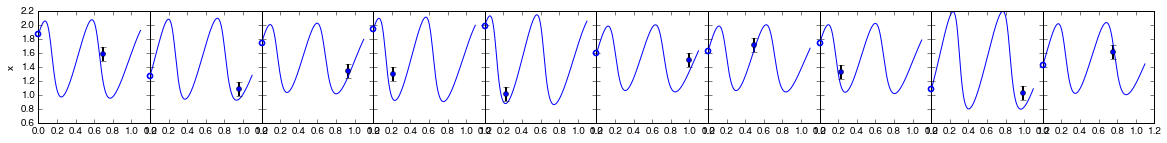

In [12]:
pylab.figure(figsize=(20,2))
m = p.getBestModel()
m.plotResults(sirIsaacData[20:30],indepParamsList[20:30],
              plotInitialConditions=True,plotFittingData=True);

We can look at the selected model's parameters:

In [13]:
m = p.getBestModel()
print m.getParameters()

[
('log_alpha_0', 1.7810495970800999),
('log_beta_0', 0.24123689002796772),
('g_0_0', 0.012544649960482662),
('h_0_0', 0.4244824580353061),
('g_0_1', -0.73184084400249039),
('h_0_1', 3.6137892464095831),
('g_0_2', 1.012961033895279),
('h_0_2', -0.96572876440648781),
('log_alpha_1', 0.27546867711019252),
('log_beta_1', 1.5171529116223366),
('g_1_1', 1.9810362516397779),
('h_1_1', 1.6792299502289243),
('g_1_0', 2.6295266852142869),
('h_1_0', 0.080923512798083616),
('g_2_2', 1.2900995166752973),
('g_2_0', -0.82010821671019873),
]


The following will use SloppyCell to output a latex file with the ODEs describing the selected model:

In [14]:
m = p.getBestModel()
FittingProblem.IO.eqns_TeX_file(m.net,filename='simpleExample_selectedModel.tex')

More details
------------

We can examine the dynamics of the hidden nodes as well using plotResults.

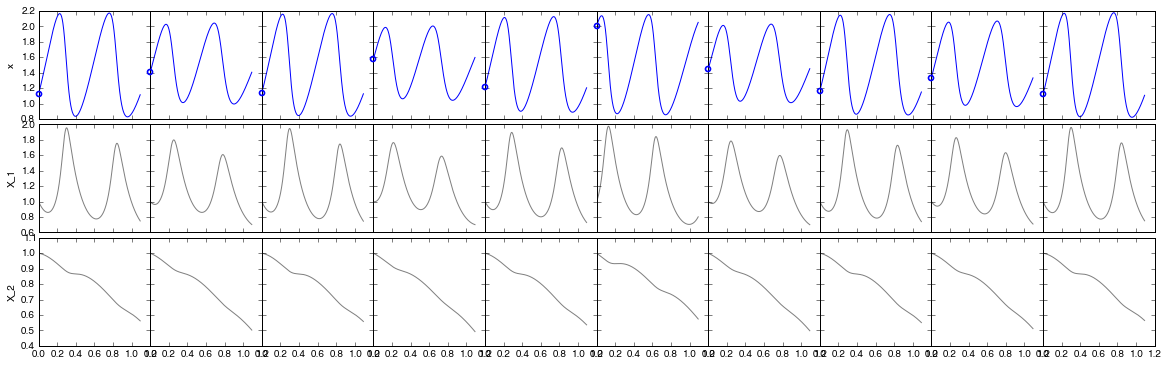

In [15]:
pylab.figure(figsize=(20,6))
m = p.getBestModel()
m.plotResults(p.fittingData[:10],p.indepParamsList[:10],
              plotInitialConditions=True,plotHiddenNodes=True);

We have access to raw trajectories using evaluateVec.  Here we use this to plot a projection of trajectories in phase space for the first in-sample initial conditions:

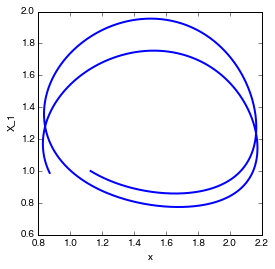

In [17]:
pylab.figure(figsize=(4,4))
times = scipy.linspace(0,1,1000)
xdata = m.evaluateVec(times,'x',p.indepParamsList[0])
X1data = m.evaluateVec(times,'X_1',p.indepParamsList[0])
FittingProblem.Plotting.plot(xdata,X1data)
pylab.xlabel('x')
pylab.ylabel('X_1')

We can also look at other models that SirIsaac fit in searching for the best one.  In this case, 'Model 7' was selected because it has the largest estimated log-likelihood:

In [18]:
for name in p.fittingModelNames:
  if name in p.logLikelihoodDict.keys():
    print name, ': #species =',len(p.fittingModelDict[name].speciesNames),\
                ', #params =',p.numParametersDict[name],\
                ', L =', p.logLikelihoodDict[name]
print
print 'Selected model:',p.maxLogLikelihoodName()

Model 1 : #species = 1 , #params = 2 , L = -224.078124024
Model 2 : #species = 1 , #params = 4 , L = -139.09319873
Model 3 : #species = 2 , #params = 7 , L = -139.096347922
Model 4 : #species = 2 , #params = 9 , L = -66.809871465
Model 5 : #species = 2 , #params = 11 , L = -59.7395273663
Model 6 : #species = 3 , #params = 14 , L = -60.3838390433
Model 7 : #species = 3 , #params = 16 , L = -40.2188550407
Model 8 : #species = 3 , #params = 18 , L = -51.4600979299
Model 9 : #species = 3 , #params = 20 , L = -52.8803083782
Model 10 : #species = 3 , #params = 22 , L = -47.4921652601

Selected model: Model 7


A model with more parameters fits in-sample data better but out-of-sample data worse:

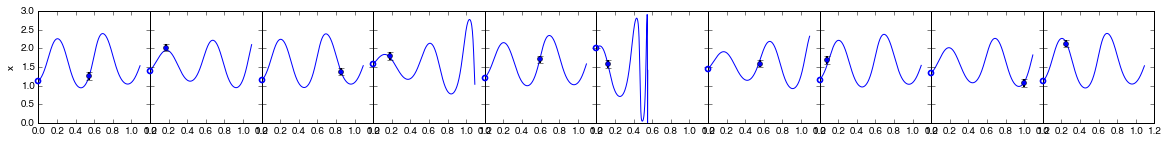

In [19]:
pylab.figure(figsize=(20,2))
m2 = p.fittingModelDict['Model 10']
m2.plotResults(sirIsaacData[:10],indepParamsList[:10],
              plotInitialConditions=True,plotFittingData=True);

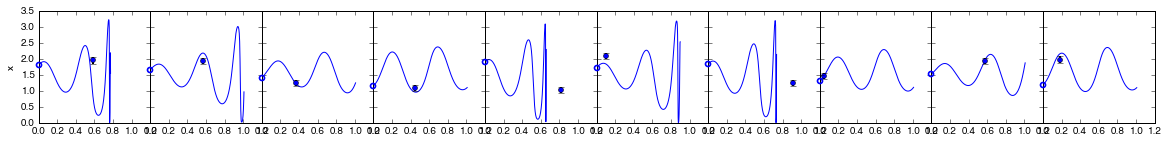

In [20]:
pylab.figure(figsize=(20,2))
m2.plotResults(sirIsaacData[30:40],indepParamsList[30:40],
              plotInitialConditions=True,plotFittingData=True);

Also potentially useful is the Hessian at the best-fit parameters:

In [21]:
hess = p.HessianDict[p.maxLogLikelihoodName()]
u,singVals,vt = scipy.linalg.svd( hess )
scipy.sort(singVals)

array([  1.12086971e-01,   1.15477854e-01,   1.26763539e-01,
         1.40870168e-01,   1.55337592e-01,   4.16418860e-01,
         8.85056788e-01,   1.32022348e+00,   2.74710609e+00,
         4.25019180e+00,   1.20749390e+01,   1.72704038e+01,
         1.96847715e+02,   1.94928103e+03,   2.35636344e+03,
         2.31935689e+04])

Other details about what happened during parameter fitting are stored within each fittingModel:

In [22]:
m = p.getBestModel()
print "Acceptance ratio for initial parameter ensemble =",m.acceptanceRatio
c = sum(scipy.array(m.currentResiduals(p.fittingData,p.indepParamsList,includePriors=False))**2)
print "Sum of squared residuals at best-fit (without priors) =",c
print "Convergence flags for local fits:",m.convFlagList
print "Number of cost evaluations for local fits:",m.numCostCallsList
print "Number of gradient evaluations for local fits:",m.numGradCallsList

Acceptance ratio for initial parameter ensemble = 0.922
Sum of squared residuals at best-fit (without priors) = 17.7346834833
Convergence flags for local fits: [4, 4, 4, 4, 1, 1, 1, 4, 2, 4]
Number of cost evaluations for local fits: [53, 43, 45, 148, 168, 116, 278, 87, 128, 9]
Number of gradient evaluations for local fits: [17, 13, 14, 46, 49, 33, 85, 27, 41, 1]


Finally, since in this case we know the function used to create the data, we can compare:

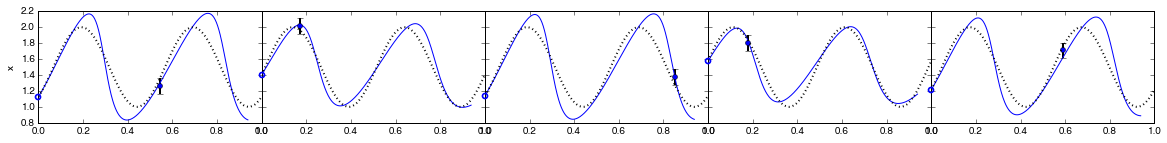

In [23]:
pylab.figure(figsize=(20,2))
indicesToPlot = range(5)
axArray = p.plotBestModelResults(plotInitialConditions=True,indices=indicesToPlot)

# compare to underlying known model
f = lambda x0,t: 1.5 + 0.5*scipy.sin(4.*scipy.pi*t + scipy.arcsin(2.*x0 - 3.))
for i,indepParams in enumerate(scipy.array(indepParamsList)[indicesToPlot]):
    times = scipy.linspace(0,1,100)
    x0 = indepParams[0]
    FittingProblem.Plotting.sca(axArray[0][i])
    FittingProblem.Plotting.plot(times,f(x0,times),'k:')